## CIFAR20 (CIFAR100 with 20 classes)

## Imports

In [1]:
# to make import as we would be in root directory
import sys
sys.path.append('..')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tf_layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets.cifar100 import load_data as load_data_CIFAR_100
from tensorflow.keras.losses import CategoricalCrossentropy

import nn
import nn.layers
import nn.activations
import nn.losses
import nn.network
import nn.callbacks
import demo_utils

## Loading data

In [3]:
(x_train_cifar20, y_train_cifar20), (x_test_cifar20, y_test_cifar20) = load_data_CIFAR_100(label_mode='coarse')

y_train_cifar20 = y_train_cifar20.flatten()
y_test_cifar20 = y_test_cifar20.flatten()

cifar20 = {
    'train': {
        'x': x_train_cifar20 / 255 - 0.5,
        'y': y_train_cifar20,
        'y_hot': np.array(tf.one_hot(y_train_cifar20, 20))
    },
    'test': {
        'x': x_test_cifar20 / 255 - 0.5,
        'y': y_test_cifar20,
        'y_hot': np.array(tf.one_hot(y_test_cifar20, 20))
    }
}

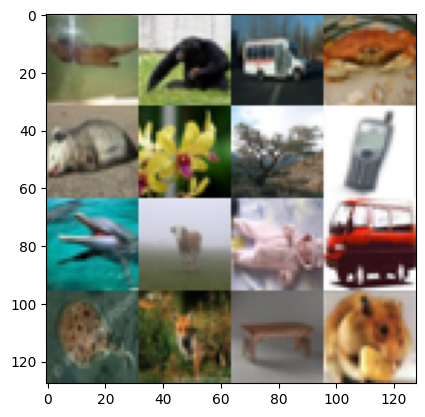

In [5]:
demo_utils.plot_random_images(cifar20['train']['x']+0.5)

## Tensorflow

### Creating and fitting

In [29]:
tf_model_cifar20 = keras.models.Sequential([
    tf_layers.InputLayer((32, 32, 3)),
    tf_layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf_layers.MaxPooling2D(),
    tf_layers.Dropout(0.2),
    tf_layers.Flatten(),
    tf_layers.Dense(256, activation='relu'),
    tf_layers.Dropout(0.5),
    tf_layers.Dense(20 , activation=None)
])

In [30]:
tf_model_cifar20.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 128)       

In [31]:
tf_model_cifar20.compile(optimizer=SGD(learning_rate=0.001),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'],
)

In [33]:
last_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_cifar20_last')
best_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('saved_models/tf_cifar20_best', save_best_only=True)

tf_cifar20_history = tf_model_cifar20.fit(
    cifar20['train']['x'],
    cifar20['train']['y_hot'],
    validation_data=(cifar20['test']['x'], cifar20['test']['y_hot']),
    epochs=10,
    batch_size=1,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback]
)

Epoch 1/10
49992/50000 [============================>.] - ETA: 0s - loss: 2.7464 - categorical_accuracy: 0.1450INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 453s 9ms/step - loss: 2.7465 - categorical_accuracy: 0.1450 - val_loss: 2.4901 - val_categorical_accuracy: 0.2393
Epoch 2/10
49991/50000 [============================>.] - ETA: 0s - loss: 2.4198 - categorical_accuracy: 0.2487INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 956s 19ms/step - loss: 2.4199 - categorical_accuracy: 0.2487 - val_loss: 2.2649 - val_categorical_accuracy: 0.2949
Epoch 3/10
49997/50000 [============================>.] - ETA: 0s - loss: 2.2322 - categorical_accuracy: 0.3067INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 705s 14ms/step - loss: 2.2322 - categorical_accuracy: 0.3067 - val_loss: 2.0652 - val_categorical_accuracy: 0.3569
Epoch 4/10
49991/50000 [============================>.] - ETA: 0s - loss: 2.1006 - categorical_accuracy: 0.3491INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 693s 14ms/step - loss: 2.1005 - categorical_accuracy: 0.3492 - val_loss: 1.9714 - val_categorical_accuracy: 0.3813
Epoch 5/10
49999/50000 [============================>.] - ETA: 0s - loss: 1.9916 - categorical_accuracy: 0.3817INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 696s 14ms/step - loss: 1.9916 - categorical_accuracy: 0.3818 - val_loss: 1.8400 - val_categorical_accuracy: 0.4252
Epoch 6/10
49996/50000 [============================>.] - ETA: 0s - loss: 1.8915 - categorical_accuracy: 0.4092INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 697s 14ms/step - loss: 1.8915 - categorical_accuracy: 0.4092 - val_loss: 1.7857 - val_categorical_accuracy: 0.4405
Epoch 7/10
49996/50000 [============================>.] - ETA: 0s - loss: 1.7970 - categorical_accuracy: 0.4375INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 703s 14ms/step - loss: 1.7970 - categorical_accuracy: 0.4375 - val_loss: 1.6974 - val_categorical_accuracy: 0.4682
Epoch 8/10
49996/50000 [============================>.] - ETA: 0s - loss: 1.7117 - categorical_accuracy: 0.4636INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 690s 14ms/step - loss: 1.7116 - categorical_accuracy: 0.4636 - val_loss: 1.6579 - val_categorical_accuracy: 0.4861
Epoch 9/10
49990/50000 [============================>.] - ETA: 0s - loss: 1.6340 - categorical_accuracy: 0.4849INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 684s 14ms/step - loss: 1.6341 - categorical_accuracy: 0.4849 - val_loss: 1.6478 - val_categorical_accuracy: 0.4865
Epoch 10/10
49997/50000 [============================>.] - ETA: 0s - loss: 1.5688 - categorical_accuracy: 0.5047INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_last\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


INFO:tensorflow:Assets written to: saved_models\tf_cifar20_best\assets


50000/50000 [==============================] - 693s 14ms/step - loss: 1.5688 - categorical_accuracy: 0.5047 - val_loss: 1.5282 - val_categorical_accuracy: 0.5196


### Results

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.44      0.47      0.45       500
           1       0.53      0.47      0.50       500
           2       0.64      0.80      0.71       500
           3       0.71      0.37      0.49       500
           4       0.62      0.60      0.61       500
           5       0.54      0.35      0.43       500
           6       0.58      0.59      0.58       500
           7       0.51      0.53      0.52       500
           8       0.42      0.41      0.41       500
           9       0.54      0.71      0.61       500
          10       0.70      0.69      0.69       500
          11       0.36      0.59      0.45       500
          12       0.44      0.36      0.40       500
          13       0.40      0.19      0.26       500
          14       0.48      0.75      0.59       500
          15       0.39      0.28      0.33       500
          16       0.36   

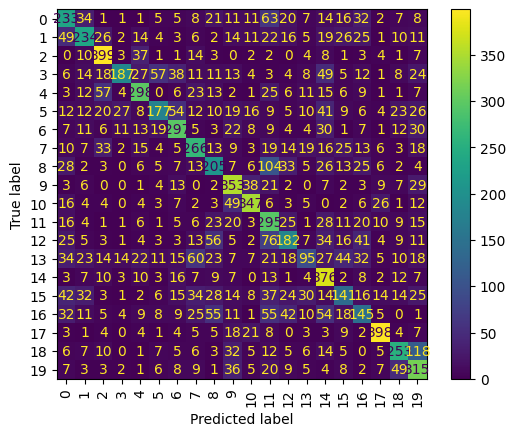

In [35]:
demo_utils.show_final_results(tf_model_cifar20, cifar20['test'])

## Own library

### Creating and fitting

In [13]:
layers = [
    nn.layers.InputLayer((32, 32, 3)),
    
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(32, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(64, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(128, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.Padding2DLayer(1, mode='same'),
    nn.layers.Conv2DLayer(128, kernel_size=3),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.Pool2DLayer(2, 'max'),
    nn.layers.DropoutLayer(0.2),
    nn.layers.FlattenLayer(),
    
    nn.layers.DenseLayer(256),
    nn.layers.BiasLayer(),
    nn.layers.ActivationLayer('relu'),
    
    nn.layers.DropoutLayer(0.5),
    nn.layers.DenseLayer(20),
    nn.layers.BiasLayer(),
]

own_model_cifar20 = nn.network.Sequential(layers)

In [14]:
own_model_cifar20.compile(
    loss='softmax_cce',
    metrics=['categorical_accuracy']
)

In [15]:
own_model_cifar20.summary()

NO   | NAME                 | PARAMS     | INPUT           | OUTPUT         
0    | InputLayer           | 0          | (32, 32, 3)     | (32, 32, 3)    
1    | Padding2DLayer       | 0          | (32, 32, 3)     | (34, 34, 3)    
2    | Conv2DLayer          | 896        | (34, 34, 3)     | (32, 32, 32)   
3    | ActivationLayer      | 0          | (32, 32, 32)    | (32, 32, 32)   
4    | Pool2DLayer          | 0          | (32, 32, 32)    | (16, 16, 32)   
5    | Padding2DLayer       | 0          | (16, 16, 32)    | (18, 18, 32)   
6    | Conv2DLayer          | 18496      | (18, 18, 32)    | (16, 16, 64)   
7    | ActivationLayer      | 0          | (16, 16, 64)    | (16, 16, 64)   
8    | Pool2DLayer          | 0          | (16, 16, 64)    | (8, 8, 64)     
9    | Padding2DLayer       | 0          | (8, 8, 64)      | (10, 10, 64)   
10   | Conv2DLayer          | 73856      | (10, 10, 64)    | (8, 8, 128)    
11   | ActivationLayer      | 0          | (8, 8, 128)     | (8, 8, 128)    

In [16]:
last_checkpoint_callback = nn.callbacks.ModelCheckpoint('saved_models/own_cifar20_last.dat', verbose=True)
best_checkpoint_callback = nn.callbacks.ModelCheckpoint('saved_models/own_cifar20_best.dat', save_best_only=True, monitor='val_loss', mode='min', verbose=True)
stopping_callback = nn.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

own_cifar20_history = own_model_cifar20.fit(
    cifar20['train']['x'],
    cifar20['train']['y_hot'],
    validation_data=(cifar20['test']['x'], cifar20['test']['y_hot']),
    learning_rate=0.001,
    epochs=10,
    callbacks=[last_checkpoint_callback, best_checkpoint_callback, stopping_callback],
)

Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [01:16<00:00, 131.20it/s, val_loss=2.4982, val_categorical_accuracy=0.2243]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [01:16<00:00, 131.07it/s, val_loss=2.2441, val_categorical_accuracy=0.2969]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [01:15<00:00, 131.64it/s, val_loss=2.0668, val_categorical_accuracy=0.3614]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [01:16<00:00, 131.45it/s, val_loss=1.9654, val_categorical_accuracy=0.3854]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [01:14<00:00, 133.79it/s, val_loss=1.8906, val_categorical_accuracy=0.4144]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [01:14<00:00, 133.48it/s, val_loss=1.7871, val_categorical_accuracy=0.4440]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [00:58<00:00, 169.54it/s, val_loss=1.7370, val_categorical_accuracy=0.4581]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [00:58<00:00, 169.90it/s, val_loss=1.6322, val_categorical_accuracy=0.4923]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [00:58<00:00, 170.87it/s, val_loss=1.5948, val_categorical_accuracy=0.5037]


Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


Validate: 100%|██████████| 10000/10000 [00:58<00:00, 171.43it/s, val_loss=1.5937, val_categorical_accuracy=0.4981]

Saving model to saved_models/own_cifar20_last.dat
Saving model to saved_models/own_cifar20_best.dat


### Results

Predict: 100%|██████████| 10000/10000 [00:52<00:00, 190.83it/s]


              precision    recall  f1-score   support

           0       0.35      0.51      0.42       500
           1       0.38      0.58      0.46       500
           2       0.74      0.69      0.72       500
           3       0.53      0.51      0.52       500
           4       0.63      0.53      0.57       500
           5       0.47      0.33      0.39       500
           6       0.73      0.52      0.61       500
           7       0.59      0.50      0.54       500
           8       0.33      0.42      0.37       500
           9       0.64      0.58      0.61       500
          10       0.63      0.76      0.69       500
          11       0.53      0.27      0.35       500
          12       0.30      0.53      0.38       500
          13       0.32      0.26      0.28       500
          14       0.62      0.63      0.63       500
          15       0.36      0.23      0.28       500
          16       0.27      0.38      0.32       500
          17       0.70    

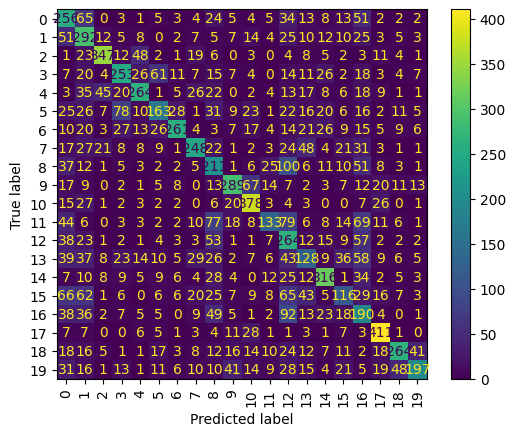

In [36]:
demo_utils.show_final_results(own_model_cifar20, cifar20['test'])

## History Comparison

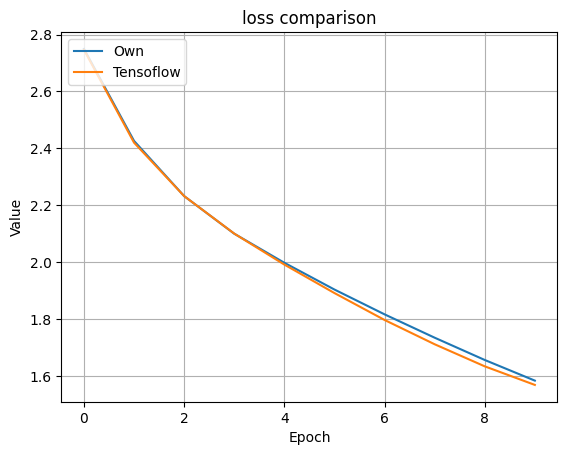

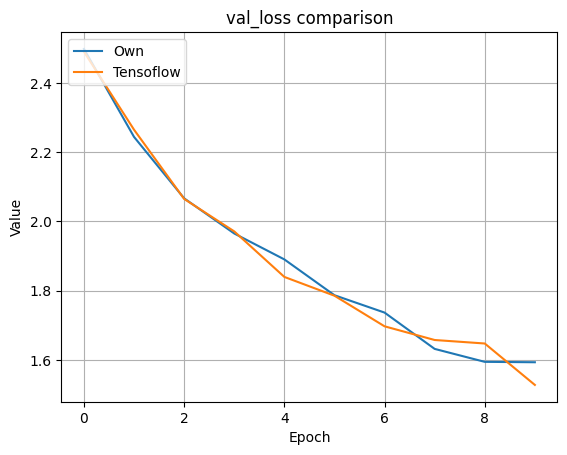

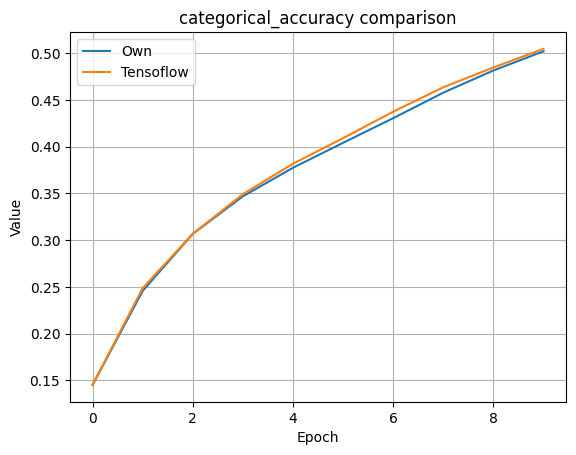

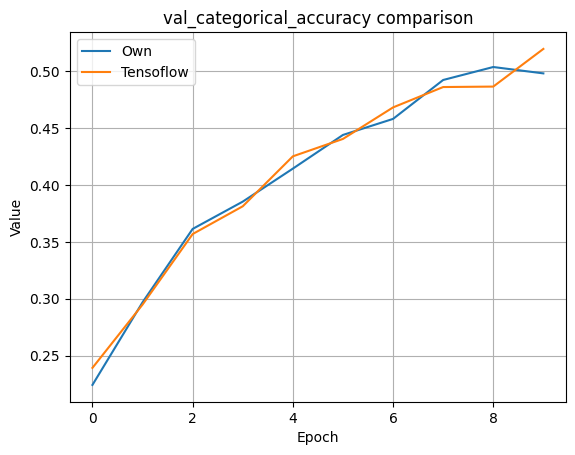

In [37]:

demo_utils.plot_history_comparison(own_cifar20_history, tf_cifar20_history.history)